4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) 60000 [9 0 0 ... 3 0 5] (10000, 28, 28) 10000


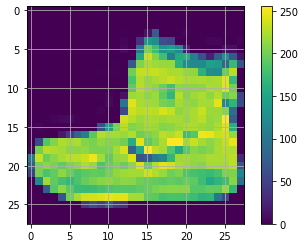

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape, len(train_labels), train_labels, test_images.shape, len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()


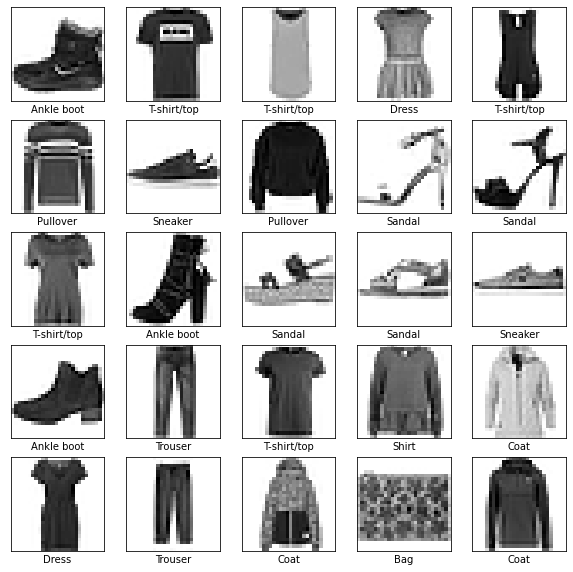

In [4]:
# 0 ~ 1 로 변환
train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1) #행열의 갯수
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6400 - accuracy: 0.7793
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3888 - accuracy: 0.8612
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3141 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8930
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total param

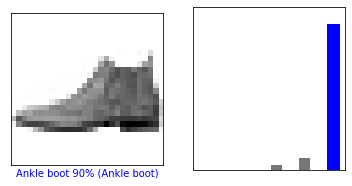

In [8]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

model.summary()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도: ', test_acc, test_loss)
predictions=model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label]),
             color = color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

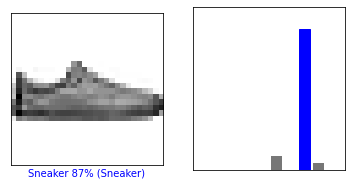

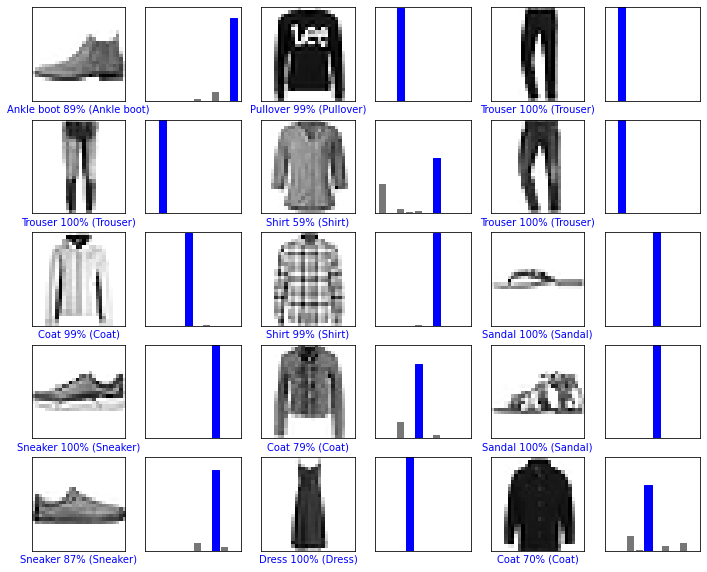

In [6]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[1.8625406e-07 3.5179959e-09 1.1071095e-08 1.1284716e-08 7.1263003e-08
  1.8807340e-02 2.4594212e-07 9.1296196e-02 2.9880261e-05 8.8986605e-01]]


9

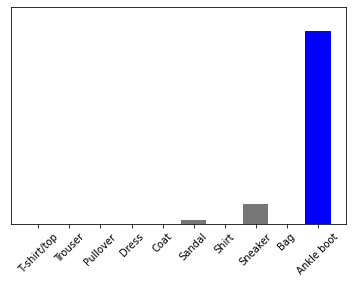

In [7]:
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_= plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])